In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
def sortiePlusProche(pos,sorties):
    # pos : Coordonnées de la personnne
    # sorties : une liste de coordonnées des sorties
    # Retourne les coordonnées de la sortie plus proche
    d = np.linalg.norm(sorties-pos, axis=1)
    indice_sortie = np.argmin(d)
    return sorties[indice_sortie]
        
#s_pos1 = sortiePlusProche(pos1,sorties)
#s_pos2 = sortiePlusProche(pos2,sorties)
#print(s_pos1,s_pos2)


def direction(pos,sorties):
    sortie = sortiePlusProche(pos,sorties)
    d = np.array((sortie-pos))
    norm = np.linalg.norm(d)
    return d / norm if norm != 0 else 0


def step(pos,sorties,v,dt): 
    dir = direction(pos,sorties)
    return v*dt*np.atleast_1d(dir)

In [4]:
def generer_people(nb,x_max,y_max):
    #x_max, y_max = dimension de l'espace
    people = np.empty((nb,6), dtype=object)
    for i in range(nb):
        # Générer aléatoirement les coordonnées des x et des y
        x = random.randint(0,x_max)
        y = random.randint(0,y_max)
        
        # Générer aléatoirement le niveau de perception(faible ou élevé)
        niveau_perception = random.choice(['faible','élevé'])
        
        # Générer aléatoirement la vitesse en fonction du niveau de perception
        if niveau_perception == 'faible':
            vitesse = np.round(random.uniform(0.8, 1.4),1) # Vitesse faible
        else:
            vitesse = np.round(random.uniform(1.5, 2.0),1) # itesse élevéé
        
        # Initialiser la colonne "sortie" à False
        sortie = False # La personne n'est pas encore sortie
        
        people[i, 0] = i # Numéro d'identification
        people[i, 1] = x # Coordonnée x
        people[i, 2] = y # Coordonnée y
        people[i, 3] = niveau_perception # Niveau de perception
        people[i, 4] = vitesse # Vitesse
        people[i, 5] = sortie # Sortie
    return people


def step_people(people,sorties,dt,t_max):
    temps = np.arange(0,t_max,dt)
    n_step=len(temps) # Nombre de pas
    res = np.empty((n_step, len(people), 6), dtype=object)
    res[0]=people
    for i in range(n_step-1):
        for j in range(len(people)):

            # Vérifier si la personne est déjà sortie
            if res[i, j, 5]: # Si la personne est déjà sortie, on passe à la personne suivante
                continue

            pos = np.array((res[i, j, 1], res[i, j, 2])) # Position actuelle de la personne
            v = res[i, j, 4] # Vitesse individuelle de la personne j
            new_step = step(pos, sorties, v, dt) # Nouveau déplacement de la personne
            new_pos = pos + new_step # Nouvelle position de la personne

            sortie = sortiePlusProche(new_pos,sorties) # Sortie vers laquelle la personne j se dirige
            marge_sortie = v * dt * 0.5 # Marge de sécurité pour déterminer si la personne est sortie
            norm = np.linalg.norm(new_pos - sortie) # Distance entre la position actuelle et la sortie

            # Vérifier si la personne a atteint la sortie
            if norm < marge_sortie:
                res[i + 1:, j, 5] = True # Mettre à jour la colonne "sortie"
                # Enregistrer les informations pour le temps qui reste
                res[i + 1:, j, 1] = new_pos[0]
                res[i + 1:, j, 2] = new_pos[1]
                res[i + 1:, j, 0] = res[i, j, 0] # Numéro d'identification inchangé
                res[i + 1:, j, 3] = res[i, j, 3] # Niveau de perception inchangé
                res[i + 1:, j, 4] = res[i, j, 4] # Vitesse inchangée
                continue
            
            # Mettre à jour les positions x et y de la personne
            res[i + 1, j, 1] = new_pos[0] # Nouvelle position x
            res[i + 1, j, 2] = new_pos[1] # Nouvelle position y
            
            # Mettre à jour le niveau de perception et la vitesse de la personne
            res[i + 1, j, 0] = res[i, j, 0] # Numéro d'identification inchangé
            res[i + 1, j, 3] = res[i, j, 3] # Niveau de perception inchangé
            res[i + 1, j, 4] = res[i, j, 4] # Vitesse inchangée
            res[i + 1, j, 5] = res[i, j, 5] # Sortie inchangée
    return res

In [9]:
def evacuation(liste_step, sorties):
    # Retourne une liste de numéro d'identification des personnes évacuées
    evacuated = [] # Liste pour suivre les personnes évacuées
    people = liste_step[-1] # Le dernier moment de la liste retournée par step_people
    for person in liste_step[-1]:
        pos = np.array([person[1], person[2]])
        sortie = sortiePlusProche(pos,sorties)

        # Vérifier si la personne a atteint la sortie
        if person[5]: # Si la colonne "sortie" est True
            evacuated.append(person[0]) # Ajouter le numéro d'identification de la personne dans la liste

    # Retirer les personnes évacuées de la liste_step
    people = [person for person in liste_step[-1] if person[0] not in evacuated] # Liste des personnes non évacuées

    # Si tous les personnes sont évacuées
    if len(people) == 0:
        print("Tous les individus sont évacués")
    # Si au moins une personne qui n'est pas évacuées
    else :
        print("Nombre d'individus évacués:", len(evacuated), "\nNombre d'individus non évacués:", len(people), "\nListe des individus non évacués:\n", people)
    
    return evacuated
        

[[[0 39 36 'faible' 1.0 False]
  [1 10 14 'élevé' 1.8 False]
  [2 14 7 'élevé' 1.6 False]
  ...
  [47 23 56 'faible' 1.1 False]
  [48 45 18 'faible' 1.1 False]
  [49 34 20 'élevé' 1.9 False]]

 [[0 39.885831535280154 35.535993005329445 'faible' 1.0 False]
  [1 8.953771251305627 12.535279751827877 'élevé' 1.8 False]
  [2 12.568916494400135 6.284458247200067 'élevé' 1.6 False]
  ...
  [47 23.84317252929818 55.29355815112855 'faible' 1.1 False]
  [48 45.99680145399479 18.465174011864235 'faible' 1.1 False]
  [49 33.62737934323745 18.136896716187252 'élevé' 1.9 False]]

 [[0 40.77166307056031 35.07198601065889 'faible' 1.0 False]
  [1 7.907542502611253 11.070559503655755 'élevé' 1.8 False]
  [2 11.13783298880027 5.568916494400135 'élevé' 1.6 False]
  ...
  [47 24.68634505859636 54.5871163022571 'faible' 1.1 False]
  [48 46.99360290798958 18.93034802372847 'faible' 1.1 False]
  [49 33.2547586864749 16.273793432374504 'élevé' 1.9 False]]

 ...

 [[0 60.259956846723696 24.863832127906633 'fai

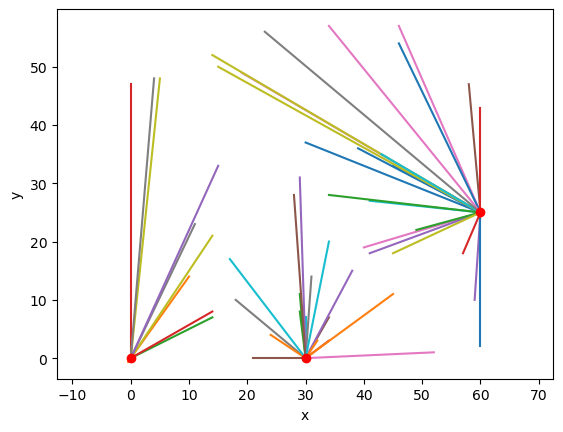

In [13]:
# Coordonnées des sorties
sortie1 = np.array((0,0))
sortie2 = np.array((30,0))
sortie3 = np.array((60,25))
sorties = np.array((sortie1,sortie2,sortie3))

nb_pers = 50
x_max = 60
y_max = 60
dt = 1
tmax = 60

people = generer_people(nb_pers,x_max,y_max)
#print(people)

liste_step = step_people(people,sorties,dt,tmax)
print(liste_step)

evacuated = evacuation(liste_step,sorties)
#print(evacuated)


def plot_xy(nb_pers,liste_step):
    pos_x = []
    pos_y = []
    res_x = []
    for i in range(nb_pers):
        pos_x = liste_step[:,i,1]
        pos_y = liste_step[:,i,2]
        plt.plot(pos_x,pos_y)
    plt.axis("equal")


# Plot personnes
plot = plot_xy(nb_pers,liste_step)

# Plot sorties
plt.plot(sorties[0][0],sorties[0][1],"ro")
plt.plot(sorties[1][0],sorties[1][1],"ro")
plt.plot(sorties[2][0],sorties[2][1],"ro")

plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [21]:
#coordonnée de la personne 1
x1 = 30
y1 = 50
pos1 = np.array((x1,y1))

x2 = 15
y2 = 60
pos2 = np.array((x2,y2))

#coordonnée de sortie
sx1 = 0
sy1 = 0
sx2 = 30
sy2 = 0
sx3 = 60
sy3 = 25
sortie1 = np.array((sx1,sy1))
sortie2 = np.array((sx2,sy2))
sortie3 = np.array((sx3,sy3))
sorties = np.array((sortie1,sortie2,sortie3))

#vitesse de mouvement de la personne
#v = 1.5 #m/s

#temps
#dt = 1
#tmax = 15

In [4]:
#obstacle
obs_a = np.array((25,25)) 
obs_b = np.array((35,25))

def positions_obstacle(point_a,point_b,delta_d):
    #ensemble des points d'un obstacle
    #delta_d = distance entre chaque points
    point = point_a
    l_obs = [point]
    dir = direction(point_a,point_b)
    
    d_max = point_b- point_a
    d_max = np.sqrt(d_max[0]**2+d_max[1]**2)
    d = 0
    
    while (d < d_max):
        point = point + dir * delta_d
        l_obs.append(point)
        d = d + delta_d
    return l_obs

obstacle = positions_obstacle(obs_a,obs_b,0.1) #liste des coord des points d'un obstacle
obs_x = [i[0] for i in obstacle]
obs_y = [i[1] for i in obstacle]
print(obstacle)

[array([25, 25]), array([25.1, 25. ]), array([25.2, 25. ]), array([25.3, 25. ]), array([25.4, 25. ]), array([25.5, 25. ]), array([25.6, 25. ]), array([25.7, 25. ]), array([25.8, 25. ]), array([25.9, 25. ]), array([26., 25.]), array([26.1, 25. ]), array([26.2, 25. ]), array([26.3, 25. ]), array([26.4, 25. ]), array([26.5, 25. ]), array([26.6, 25. ]), array([26.7, 25. ]), array([26.8, 25. ]), array([26.9, 25. ]), array([27., 25.]), array([27.1, 25. ]), array([27.2, 25. ]), array([27.3, 25. ]), array([27.4, 25. ]), array([27.5, 25. ]), array([27.6, 25. ]), array([27.7, 25. ]), array([27.8, 25. ]), array([27.9, 25. ]), array([28., 25.]), array([28.1, 25. ]), array([28.2, 25. ]), array([28.3, 25. ]), array([28.4, 25. ]), array([28.5, 25. ]), array([28.6, 25. ]), array([28.7, 25. ]), array([28.8, 25. ]), array([28.9, 25. ]), array([29., 25.]), array([29.1, 25. ]), array([29.2, 25. ]), array([29.3, 25. ]), array([29.4, 25. ]), array([29.5, 25. ]), array([29.6, 25. ]), array([29.7, 25. ]), arr

In [5]:
directions = np.array(((1,0),(-1,0),(0,1),(0,-1)))
coord = np.array((20,30))
coord2 = coord+v*dt*directions[0]
print(coord)
print(coord2)

[20 30]
[21.5 30. ]


In [6]:
def deplace_vers(coord,obstacle,v,dt):
    #coord : coord actuel de la personne
    #obstacle : liste des points
    liste_direction = np.array(((1,0),(-1,0),(0,1),(0,-1))) #droite,gauche,hau,bas
    for i in liste_direction:
        p = coord + v*dt*i #le prochain coord de la personne
        if p not in obstacle :
            return p


coord = np.array((20,30))
print(coord+v*dt*directions[0])
deplace_vers(coord,obstacle,v,dt)
        

def positions_individu(pos,sortie,obstacle,v,dt,t_max):
    res = []
    t = 0
    p = pos
    while (t<t_max):
        step = step(p,sortie,v,dt)
        p = p + step
        if p not in obstacle:
            res.append(p)
        else:
            p = deplace_vers(p,obstacle,v,dt)
        t = t + dt
    return res

[21.5 30. ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()